In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Conv2D, Dropout, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/MyDrive/regression_data.zip" -d "/content/drive/MyDrive/regression_data"

In [ ]:
image_dir = Path("/content/drive/MyDrive/regression_data/regression_data")

In [ ]:
filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath').astype(str)
intensity = pd.Series(filepaths.apply(lambda x: os.path.split(os.path.split(x)[0])[1]), name = 'Intensity').astype(np.int32)

images = pd.concat([filepaths, intensity], axis=1).sample(frac = 1.0, random_state = 1).reset_index(drop = True)

In [ ]:
images

,Filepath,Intensity
0,/content/drive/MyDrive/regression_data/regress...,20
1,/content/drive/MyDrive/regression_data/regress...,25
2,/content/drive/MyDrive/regression_data/regress...,70
3,/content/drive/MyDrive/regression_data/regress...,35
4,/content/drive/MyDrive/regression_data/regress...,40
...,...,...
1839,/content/drive/MyDrive/regression_data/regress...,40
1840,/content/drive/MyDrive/regression_data/regress...,90
1841,/content/drive/MyDrive/regression_data/regress...,45
1842,/content/drive/MyDrive/regression_data/regress...,25


In [ ]:
image_df = images.sample(1844, random_state = 1).reset_index(drop = True)
train_df, test_df = train_test_split(image_df, train_size = 0.9, shuffle = True, random_state = 1)

In [ ]:
train_generator = ImageDataGenerator(rescale = 1./255, rotation_range = 5, validation_split = 0.2)
test_generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_df

,Filepath,Intensity
1619,/content/drive/MyDrive/regression_data/regress...,20
1632,/content/drive/MyDrive/regression_data/regress...,55
1683,/content/drive/MyDrive/regression_data/regress...,90
192,/content/drive/MyDrive/regression_data/regress...,30
177,/content/drive/MyDrive/regression_data/regress...,55
...,...,...
905,/content/drive/MyDrive/regression_data/regress...,25
1791,/content/drive/MyDrive/regression_data/regress...,35
1096,/content/drive/MyDrive/regression_data/regress...,30
235,/content/drive/MyDrive/regression_data/regress...,55


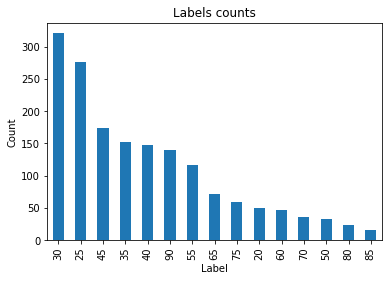

In [ ]:
train_df.Intensity.value_counts().plot(kind = 'bar')
plt.title('Labels counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
width = 310
height = 310

In [ ]:
train_images = train_generator.flow_from_dataframe(dataframe = train_df, x_col = 'Filepath', y_col = 'Intensity', 
                                                   target_size = (width, height), class_mode = 'raw',
                                                   batch_size = 4, shuffle = True, subset = 'training')

val_images = train_generator.flow_from_dataframe(dataframe = train_df, x_col = 'Filepath', y_col = 'Intensity', class_mode = 'raw',
                                                 target_size = (width, height), batch_size = 4, shuffle = True, subset = 'validation')

test_images = test_generator.flow_from_dataframe(dataframe = test_df, x_col = 'Filepath', y_col = 'Intensity', class_mode = 'raw',
                                                 target_size = (width, height), batch_size = 4, shuffle = False)

Found 1328 validated image filenames.
Found 331 validated image filenames.
Found 185 validated image filenames.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (width, height, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dropout(0.3))

model.add(Dense(units = 512, activation = 'relu'))

model.add(Dropout(0.3))

model.add(Dense(1, activation = 'linear'))

In [ ]:
model.compile(optimizer = 'adam', loss = ['mse'])

history = model.fit(train_images, validation_data = val_images, epochs = 100)

Epoch 1/100
332/332 [==============================] - 1344s 4s/step - loss: 519.3754 - val_loss: 597.5955
Epoch 2/100
332/332 [==============================] - 38s 115ms/step - loss: 435.7867 - val_loss: 452.3637
Epoch 3/100
332/332 [==============================] - 40s 119ms/step - loss: 420.8171 - val_loss: 437.7610
Epoch 4/100
332/332 [==============================] - 38s 116ms/step - loss: 405.2438 - val_loss: 432.2141
Epoch 5/100
332/332 [==============================] - 40s 120ms/step - loss: 399.1127 - val_loss: 443.8211
Epoch 6/100
332/332 [==============================] - 38s 115ms/step - loss: 393.2845 - val_loss: 420.7354
Epoch 7/100
332/332 [==============================] - 38s 115ms/step - loss: 368.2050 - val_loss: 513.4802
Epoch 8/100
332/332 [==============================] - 40s 119ms/step - loss: 373.8958 - val_loss: 388.7997
Epoch 9/100
332/332 [==============================] - 38s 115ms/step - loss: 368.0280 - val_loss: 383.7536
Epoch 10/100
332/332 [=======

In [ ]:
model.save("/content/drive/MyDrive/regression_model.hdf5")

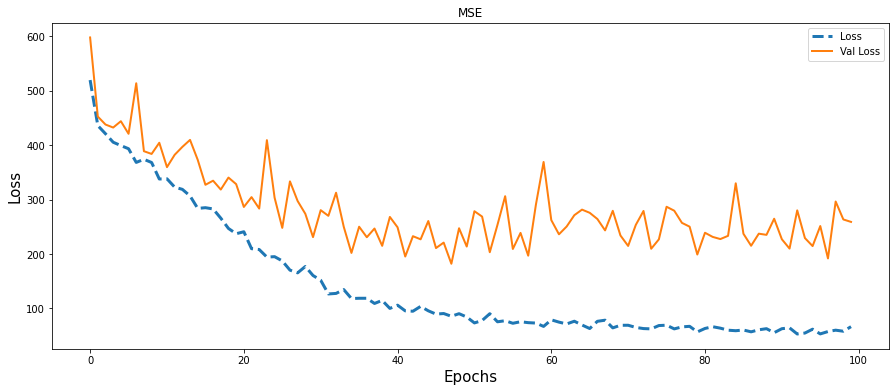

In [ ]:
plt.figure(figsize = (15, 6))
plt.plot(history.history['loss'], lw = 3, ls = '--', label = 'Loss')
plt.plot(history.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.title('MSE')
plt.legend()

In [ ]:
val_images.filenames

['/content/drive/MyDrive/regression_data/regression_data/20/20081127.18-20.jpg',
 '/content/drive/MyDrive/regression_data/regression_data/55/20101106.00-55.jpg',
 '/content/drive/MyDrive/regression_data/regression_data/90/20131012.12-115.jpg',
 '/content/drive/MyDrive/regression_data/regression_data/30/20091213.03-30.jpg',
 '/content/drive/MyDrive/regression_data/regression_data/55/20211003.18-55.jpg',
 '/content/drive/MyDrive/regression_data/regression_data/90/20070604.18-125.jpg',
 '/content/drive/MyDrive/regression_data/regression_data/25/20060114.18-25.jpg',
 '/content/drive/MyDrive/regression_data/regression_data/90/20200519.18-100.jpg',
 '/content/drive/MyDrive/regression_data/regression_data/30/20100521.03-30(2).jpg',
 '/content/drive/MyDrive/regression_data/regression_data/30/20001130.03-30.jpg',
 '/content/drive/MyDrive/regression_data/regression_data/90/20191104.12-100.jpg',
 '/content/drive/MyDrive/regression_data/regression_data/30/20051028.06-30.jpg',
 '/content/drive/MyDr

In [ ]:
val_images.reset()
predicted_intensity = np.squeeze(model.predict(val_images))
true_intensity = val_images.labels

rmse = np.sqrt(model.evaluate(val_images, verbose=0))
print("Validation RMSE: {:.5f}".format(rmse))

r2 = r2_score(true_intensity, predicted_intensity)
print("Validation R^2 Score: {:.5f}".format(r2))

Validation RMSE: 15.92495
Validation R^2 Score: -0.44389


In [ ]:
predicted_intensity

In [ ]:
test_images.reset()
predicted_intensity = np.squeeze(model.predict(test_images))
true_intensity = test_images.labels

rmse = np.sqrt(model.evaluate(test_images, verbose=0))
print("     Test RMSE: {:.5f}".format(rmse))

r2 = r2_score(true_intensity, predicted_intensity)
print("Test R^2 Score: {:.5f}".format(r2))

     Test RMSE: 14.96659
Test R^2 Score: 0.42974


In [ ]:
null_rmse = np.sqrt(np.sum((true_intensity - np.mean(true_intensity))**2) / len(true_intensity))
print("Null/Baseline Model Test RMSE: {:.5f}".format(null_rmse))

Null/Baseline Model Test RMSE: 19.81923


In [ ]:
print("{0:5} {1:10}".format("True", "Predicted"))
for i in range(len(predicted_intensity[:10])):
    print("{0:5} {1:10}".format(true_intensity[i], int(predicted_intensity[i])))

True  Predicted 
   45         39
   30         45
   60         38
   25         21
   75         32
   30         23
   30         24
   35         34
   90         58
   55         34
